In [1]:
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from sklearn.metrics.pairwise import pairwise_kernels


from dwd.gen_kern_dwd import solve_gen_kern_dwd
from dwd.gen_dwd import solve_gen_dwd
from dwd.viz import ABLine2D, clf2D_slope_intercept


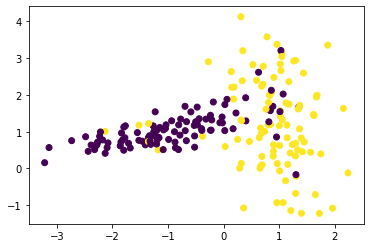

In [2]:
params = {'n_features': 2,
          'n_redundant': 0,
          'n_classes': 2,
          'n_clusters_per_class': 1,
          'flip_y': .1,
          'class_sep': 1.0}

X, y = make_classification(n_samples=200, random_state=0, **params)


plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
# K = pairwise_kernels(X)
K = X.dot(X.T)

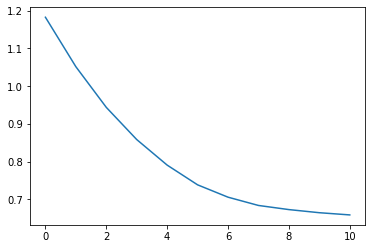

In [19]:
alpha, offset_k, obj_vals, c = solve_gen_kern_dwd(K, y, lambd=.1, max_iter=10,
                                                  implicit_P=True)
beta_k = alpha.T.dot(X)

plt.plot(obj_vals)

In [20]:
beta, offset, obj_vals, c, = solve_gen_dwd(X, y, lambd=.1, max_iter=1000)


# plt.plot(obj_vals)

# plt.figure()
# plt.scatter(X[:, 0], X[:, 1], c=y)
# ABLine2D(*clf2D_slope_intercept(coef=beta, intercept=offset), label='linear', color='blue')

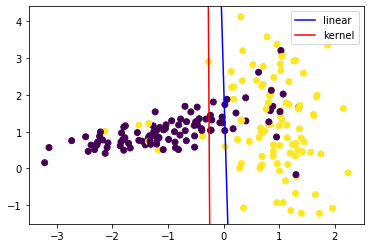

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y)

ABLine2D(*clf2D_slope_intercept(coef=beta, intercept=offset), label='linear', color='blue')
ABLine2D(*clf2D_slope_intercept(coef=beta_k, intercept=offset_k), label='kernel', color='red')
plt.legend()

# Make kernel Sklearn object

In [39]:
kdwd = KernGenDWD(lambd=.1).fit(X, y)

In [41]:
kdwd.score(X, y)

0.86